In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)[:int(len(X)*.5//1)]
X = X/255
X=X[:int(len(X)*.5//1)]


In [3]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=56)

In [96]:
import math
from numpy import mean, nan,std,argmax,prod
from scipy.stats import beta
from sympy import ln
import tqdm
from scipy.special import gamma



class naiveB:
    def fit(self,X,y):
        X=X.to_numpy()
        y=y.to_numpy()
        self.C=[]
        self.A=[]
        self.B=[]
        self.pre=[]
        for i in range(10):

            x_i=X[y==i]
            self.C.append(len(x_i)/len(y))
            self.A.append([])
            self.B.append([])
            self.pre.append([])
            for j in range(len(X[0])):
                x_j=x_i[:,j]
                E=mean(x_j)
                a=(E*(1-E)/pow(std(x_j),2)-1)*E
                b=(E*(1-E)/pow(std(x_j),2)-1)*(1-E)
                self.A[i].append(a)
                self.B[i].append(b)
                self.pre[i].append(gamma(a*b)/gamma(a)/gamma(b))




    def predict(self,X):
        X=X.to_numpy()
        ret=[]

        for x in X:
            prob=[]
            for i in range(10):
                cond=self.C[i]
                for j in range(len(self.A[i])):
                    if math.isnan(self.pre[i][j]) or math.isnan(self.A[i][j]):continue
                    z=self.pre[i][j]*pow(x[j],self.A[i][j]-1)*pow(1-x[j],self.B[i][j]-1)
                    if not np.isnan(z) and not np.isinf(z):
                        cond*=z


                prob.append(cond)
            ret.append(argmax(prob))
        return ret






In [100]:
import time
cl=naiveB()
cl.fit(X_train,y_train)
start = time.time()
cl.fit(X_train,y_train)

end = time.time()
print("training time "+str(int(end - start))+"s")

<ipython-input-96-ba1375821743>:28: RuntimeWarning: invalid value encountered in scalar divide
  a=(E*(1-E)/pow(std(x_j),2)-1)*E
<ipython-input-96-ba1375821743>:29: RuntimeWarning: invalid value encountered in scalar divide
  b=(E*(1-E)/pow(std(x_j),2)-1)*(1-E)


training time 0s


In [101]:
from sklearn.metrics import accuracy_score



start = time.time()
p=cl.predict(X_test)
end = time.time()
print(accuracy_score(y_test,p))
print("Test time "+str(int(end - start))+"s")


<ipython-input-96-ba1375821743>:47: RuntimeWarning: divide by zero encountered in scalar power
  z=self.pre[i][j]*pow(x[j],self.A[i][j]-1)*pow(1-x[j],self.B[i][j]-1)
<ipython-input-96-ba1375821743>:47: RuntimeWarning: invalid value encountered in scalar multiply
  z=self.pre[i][j]*pow(x[j],self.A[i][j]-1)*pow(1-x[j],self.B[i][j]-1)
<ipython-input-96-ba1375821743>:49: RuntimeWarning: overflow encountered in scalar multiply
  cond*=z


0.5188571428571429
Test time 207s


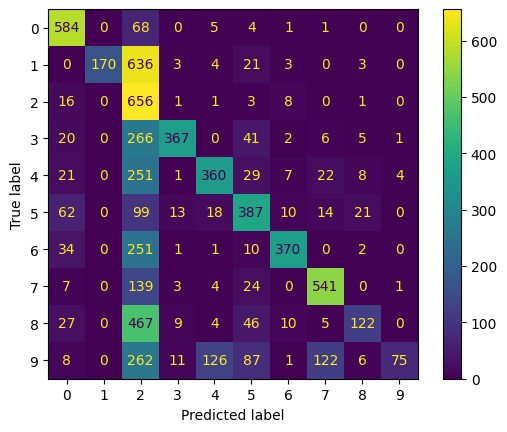

In [104]:
from sklearn import metrics
from numpy import arange
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,p)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = arange(10))

cm_display.plot()
plt.show()